In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np, os
from scipy.stats import pearsonr, spearmanr

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.set_index('Number of blast', inplace=True)

In [4]:
# Check the first few rows of the dataset
df.head()

,Hole Diameter (mm),Hole Depth (m),Burden to Spacing Ratio,Stemming (m),Max Charge Per Delay (Kg),Powder Factor (kg/m3),Flyrock Distance (m)
Number of blast,,,,,,,
1,75,10.0,0.40,1.8,47.7,0.50,75
2,75,10.0,0.40,1.8,47.7,0.60,80
3,75,10.0,0.44,2.0,47.7,0.55,84
4,75,11.0,0.42,2.0,53.0,0.50,90
5,75,11.0,0.42,1.4,53.0,0.45,67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 1 to 262
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hole Diameter (mm)         262 non-null    int64  
 1   Hole Depth (m)             262 non-null    float64
 2   Burden to Spacing Ratio    262 non-null    float64
 3   Stemming (m)               262 non-null    float64
 4   Max Charge Per Delay (Kg)  262 non-null    float64
 5   Powder Factor (kg/m3)      262 non-null    float64
 6   Flyrock Distance (m)       262 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 16.4 KB


In [6]:
df.describe()

,Hole Diameter (mm),Hole Depth (m),Burden to Spacing Ratio,Stemming (m),Max Charge Per Delay (Kg),Powder Factor (kg/m3),Flyrock Distance (m)
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,115.812977,19.755725,0.702252,2.975382,257.626718,0.784695,204.583969
std,28.203817,5.654777,0.144508,0.770564,152.894229,0.162343,64.284975
min,75.000000,10.000000,0.400000,1.400000,47.700000,0.450000,67.000000
25%,89.000000,15.000000,0.532500,2.500000,126.900000,0.650000,157.000000
50%,115.000000,20.000000,0.750000,3.000000,201.600000,0.800000,189.000000
75%,150.000000,24.750000,0.830000,3.575000,360.500000,0.900000,260.000000
max,150.000000,29.000000,0.950000,4.500000,593.800000,1.140000,354.000000


In [7]:
df.isnull().sum()

Hole Diameter (mm)           0
Hole Depth (m)               0
Burden to Spacing Ratio      0
Stemming (m)                 0
Max Charge Per Delay (Kg)    0
Powder Factor (kg/m3)        0
Flyrock Distance (m)         0
dtype: int64

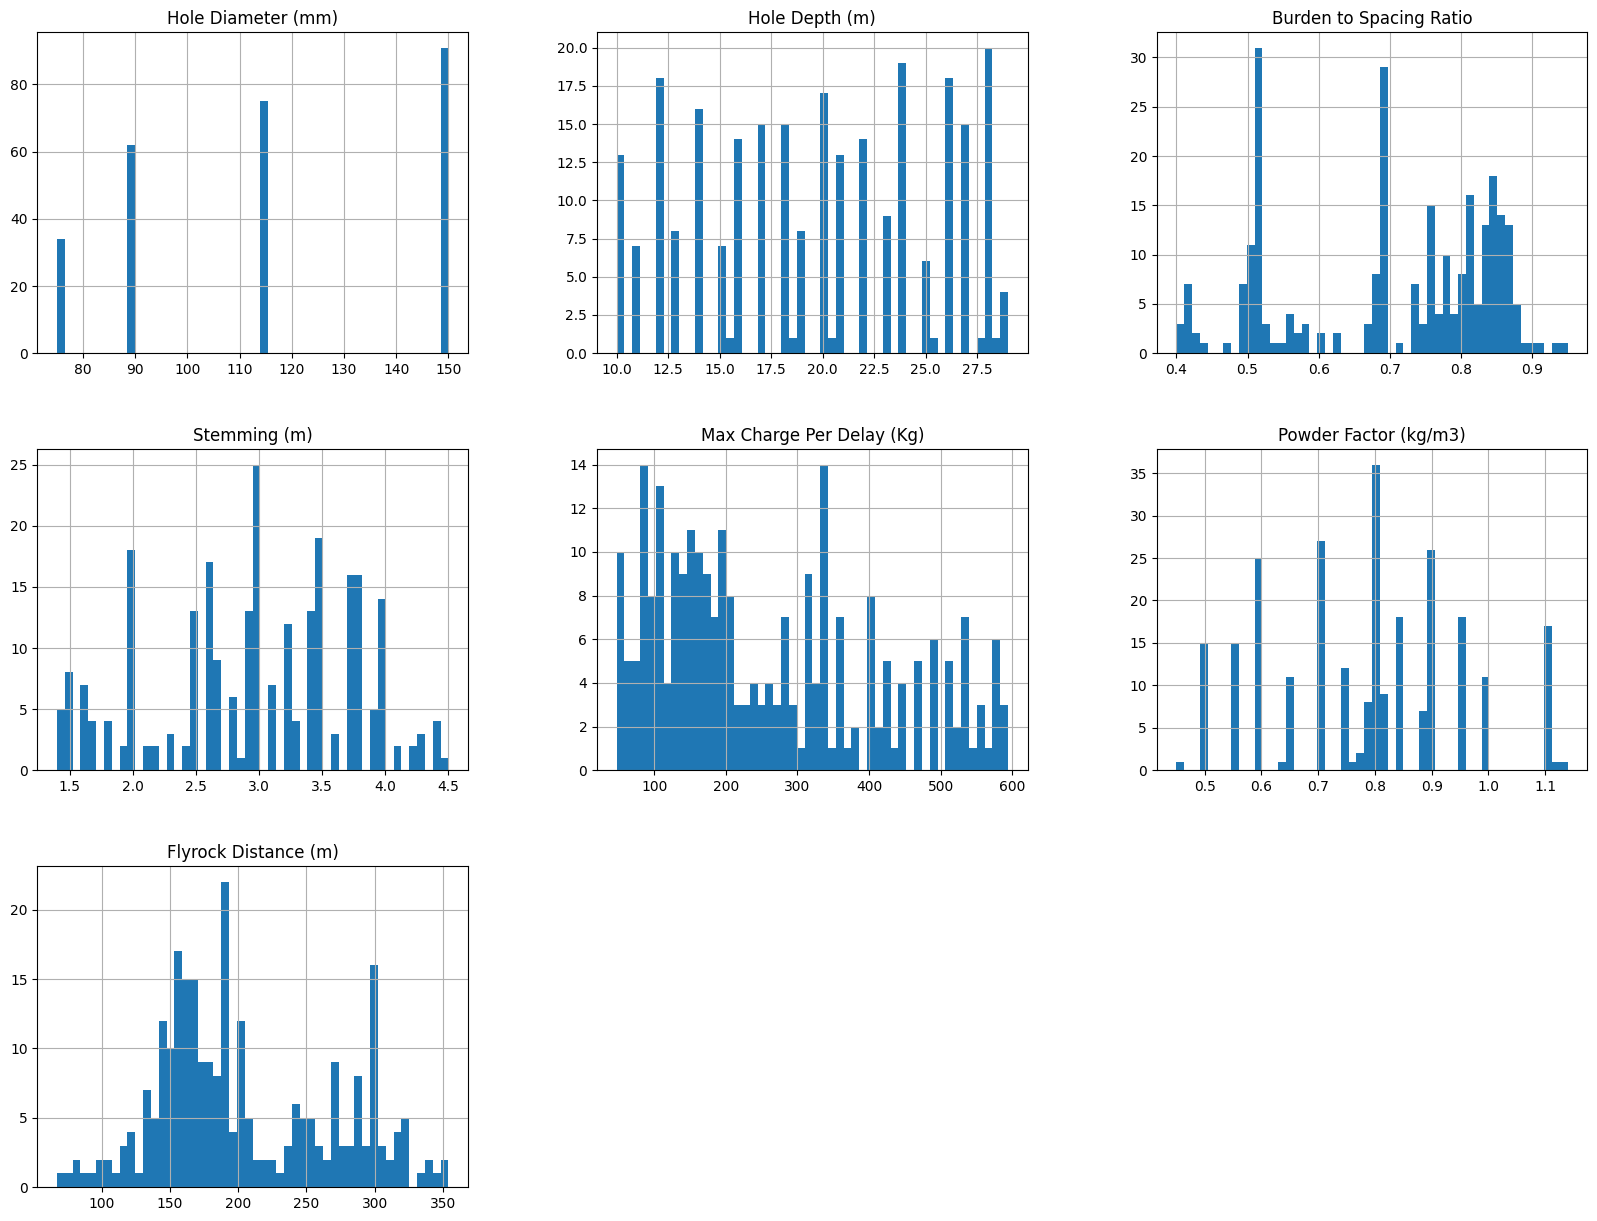

In [8]:
# Visualize the distribution of each variable using histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

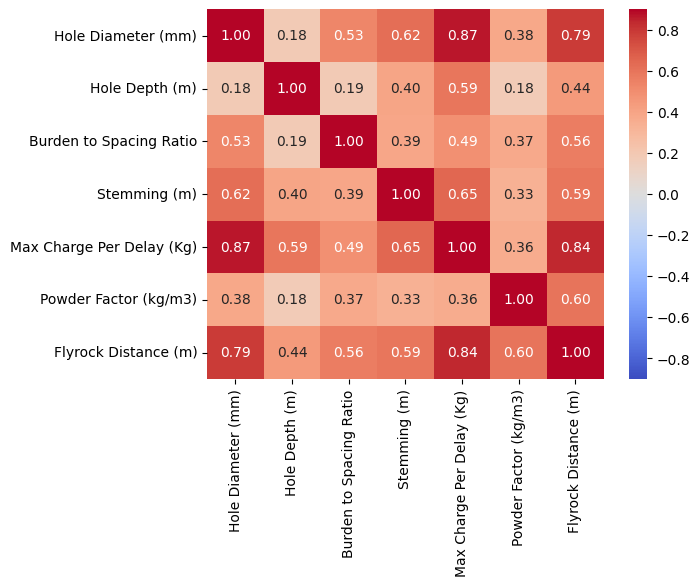

In [9]:
# Visualize the correlations between variables using a heatmap
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-0.9, vmax=0.9, annot=True, fmt='.2f')
plt.show()

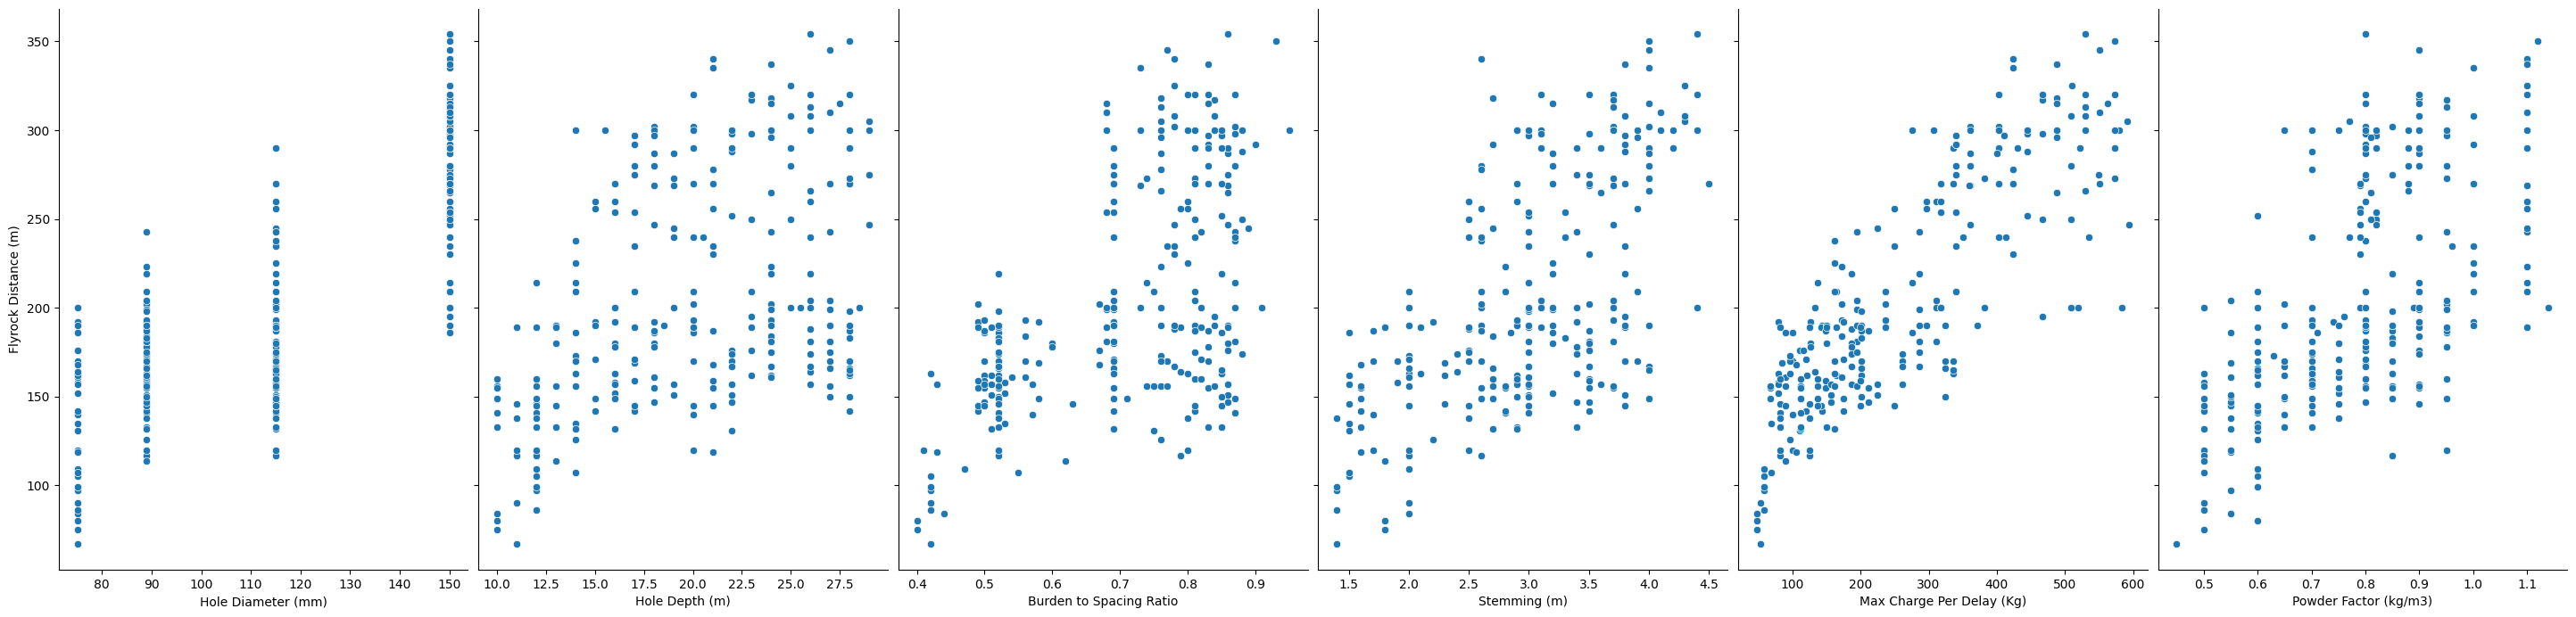

In [10]:
# Visualize the relationship between the target variable and the other variables using scatterplots
sns.pairplot(df, x_vars=['Hole Diameter (mm)', 'Hole Depth (m)', 'Burden to Spacing Ratio', 'Stemming (m)', 'Max Charge Per Delay (Kg)', 'Powder Factor (kg/m3)'], y_vars=['Flyrock Distance (m)'], height=7, aspect=0.7)
plt.show()

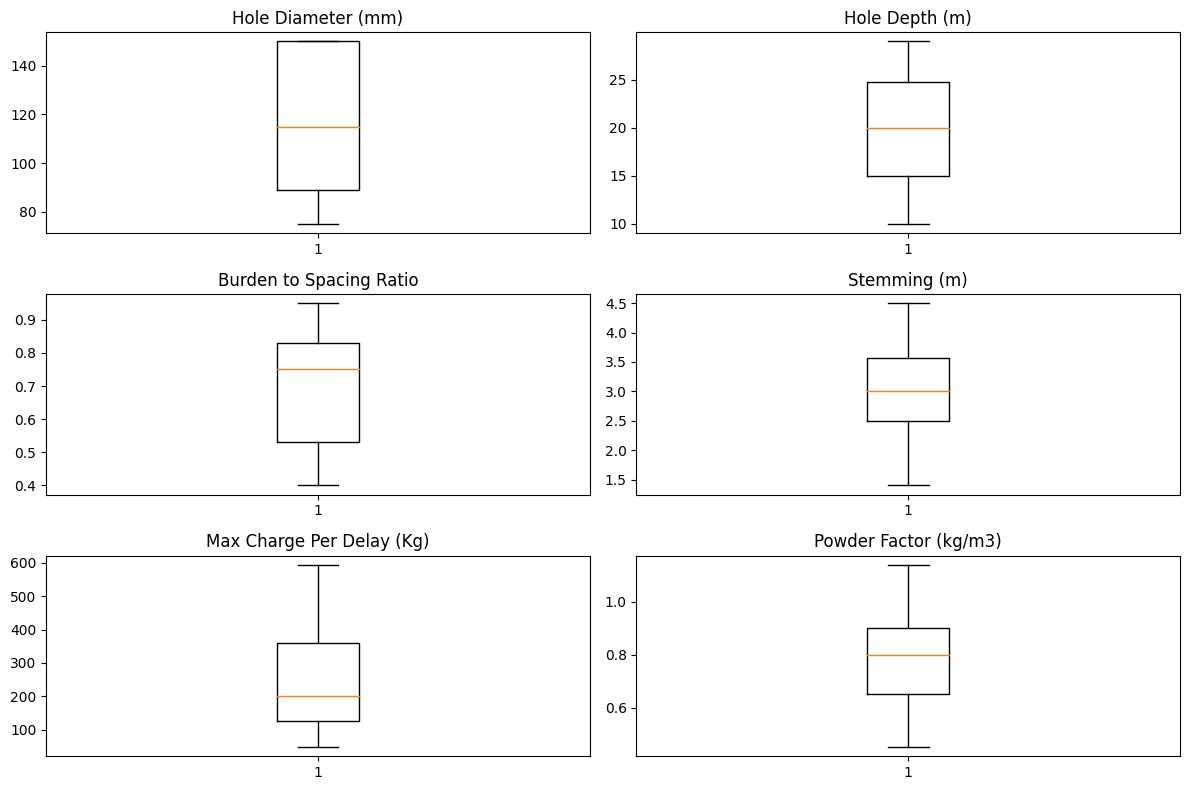

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['Hole Diameter (mm)', 'Hole Depth (m)', 'Burden to Spacing Ratio', 'Stemming (m)', 'Max Charge Per Delay (Kg)', 'Powder Factor (kg/m3)']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

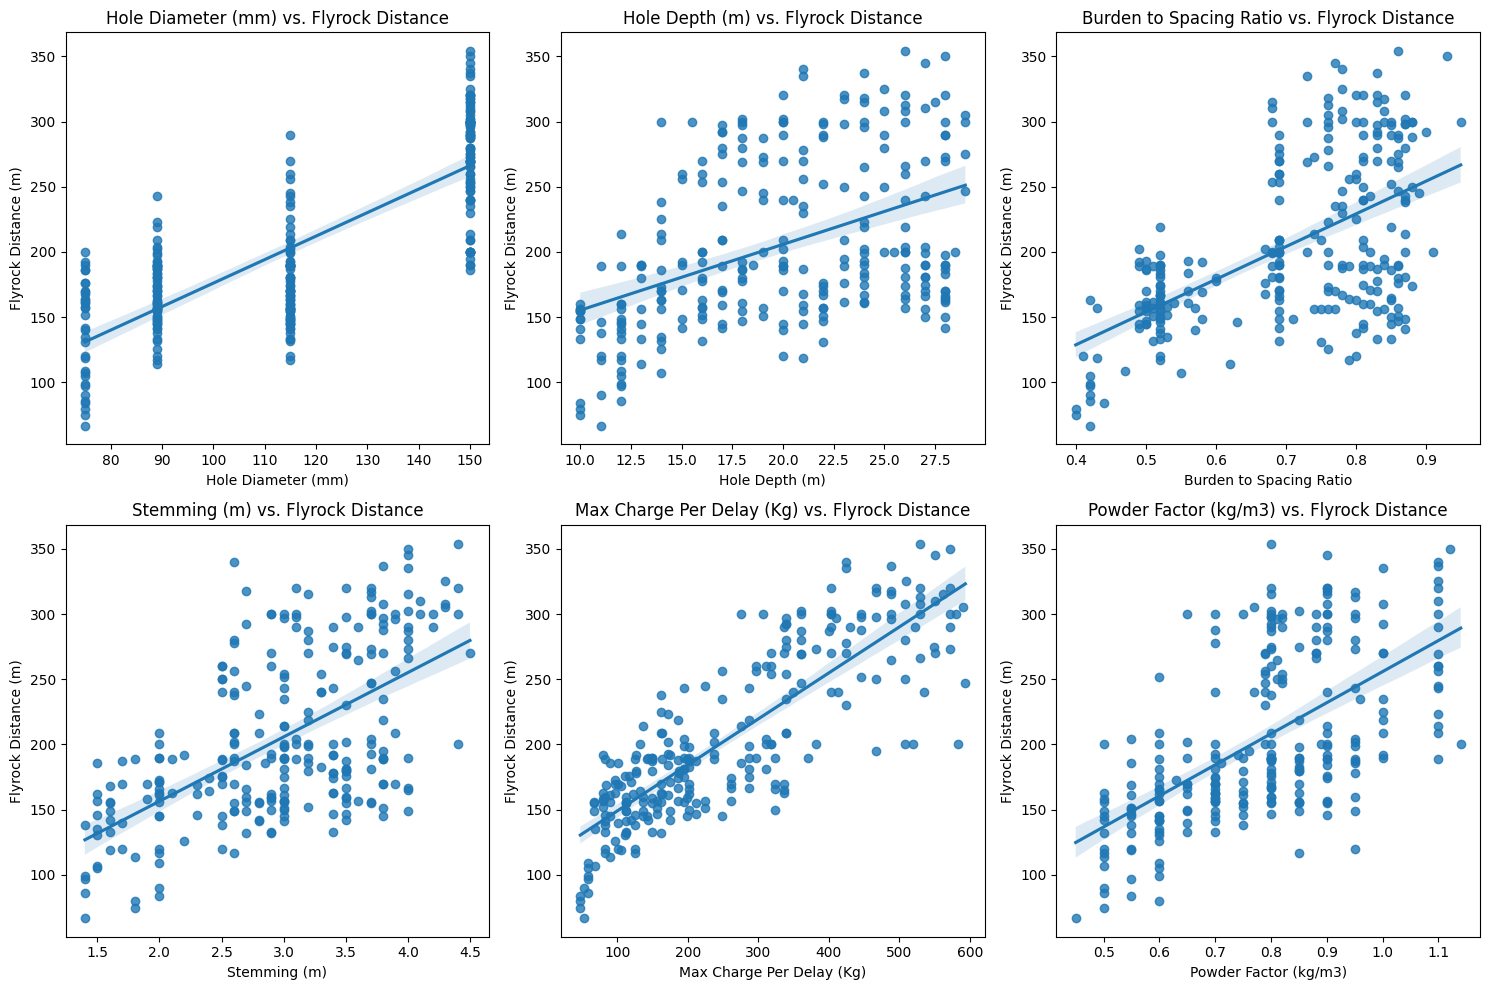

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Hole Diameter (mm)', 'Hole Depth (m)', 'Burden to Spacing Ratio', 'Stemming (m)', 'Max Charge Per Delay (Kg)', 'Powder Factor (kg/m3)']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through the subplots and plot regression plots
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        sns.regplot(x=columns_to_plot[i], y='Flyrock Distance (m)', data=df, ax=ax)
        ax.set_title(f'{columns_to_plot[i]} vs. Flyrock Distance')

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
corr_p, p_val_p = pearsonr(df['Flyrock Distance (m)'], df['Hole Diameter (mm)'])
print("Pearson correlation coefficient:", corr_p)
print("p-value:", p_val_p)

Pearson correlation coefficient: 0.7903514240130989
p-value: 2.959044512392679e-57


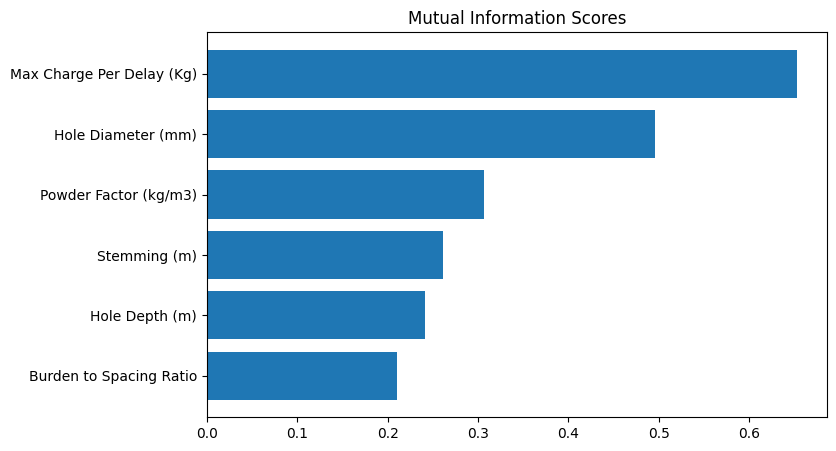

In [15]:
from sklearn.feature_selection import mutual_info_regression

X = df.copy()
y = X.pop('Flyrock Distance (m)')


def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


In [16]:
#Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop('Flyrock Distance (m)', axis=1)
y = df['Flyrock Distance (m)']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
pip install xgboost

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean Absolute Error (MAE) on Test Set: 16.382441970537293
R-squared (R2) Score on Test Set: 0.8563709168013346
Root Mean Squared Error (RMSE) on Test Set: 25.05333768147428
Normalized Root Mean Squared Error (NRMSE) on Test Set: 0.09981409434850311
Mean Absolute Deviation (MAD) on Test Set: 16.382441970537293
Variance Accounted For (VAF) on Test Set: 0.856397353240288


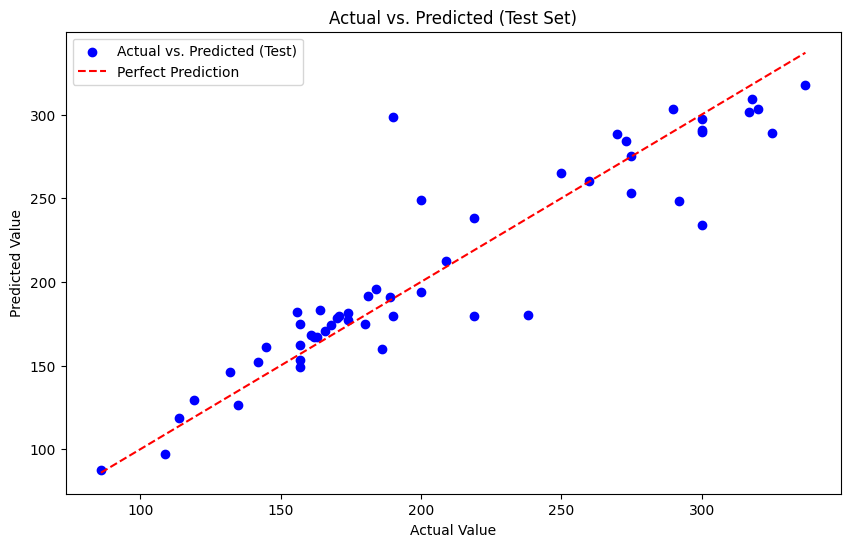

In [18]:
#trying new metrices
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoostRegressor
xgb_model = XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the testing set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) on Test Set:", mae_test)

# Calculate R-squared (R2) score on the testing set
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score on Test Set:", r2_test)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / (y_test.max() - y_test.min())
print("Normalized Root Mean Squared Error (NRMSE) on Test Set:", nrmse_test)

# Calculate Mean Absolute Deviation (MAD)
mad_test = np.mean(np.abs(y_test - y_pred_test))
print("Mean Absolute Deviation (MAD) on Test Set:", mad_test)

# Calculate Variance Accounted For (VAF)
vaf_test = 1 - (np.var(y_test - y_pred_test) / np.var(y_test))
print("Variance Accounted For (VAF) on Test Set:", vaf_test)

# Plot the curve for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


In [19]:
#tring with metrices
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

kernel_ridge = KernelRidge(kernel=ExpSineSquared())

param_distributions = {
    "alpha": loguniform(1e-2, 1e3),
    "kernel__length_scale": loguniform(1e-2, 1e2),
    "kernel__periodicity": loguniform(1e-2, 1e2),
}

kernel_ridge_tuned = RandomizedSearchCV(
    kernel_ridge,
    param_distributions=param_distributions,
    n_iter=100,
    random_state=0,
)


# Train the model
kernel_ridge_tuned.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = kernel_ridge_tuned.predict(X_test)

# Compute evaluation metrics
#coeff = model.coef_
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("EVS",evs)
print("MAE",mae)
print("MAPE",mape)
print("RMSE",rmse)
print("R2",r2)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (y_test.max() - y_test.min())
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Variance Accounted For (VAF)
vaf = 1 - (np.var(y_test - y_pred) / np.var(y_test))
print("Variance Accounted For (VAF):", vaf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255:

EVS 0.8124192404824131
MAE 23.405100747200954
MAPE 11.353662887820162
RMSE 28.806145523843906
R2 0.8101190023594966
Root Mean Squared Error (RMSE): 28.806145523843906
Normalized Root Mean Squared Error (NRMSE): 0.11476552001531437
Mean Absolute Deviation (MAD): 23.405100747200954
Variance Accounted For (VAF): 0.8124192404824131


In [20]:
#tring with metrices and RBF Kernal
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils.fixes import loguniform
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernel_ridge = KernelRidge(kernel=RBF())

param_distributions = {
    "alpha": loguniform(1e-2, 1e3),
    "kernel__length_scale": loguniform(1e-2, 1e2),
}

kernel_ridge_tuned = RandomizedSearchCV(
    kernel_ridge,
    param_distributions=param_distributions,
    n_iter=100,
    random_state=0,
)


# Train the model
kernel_ridge_tuned.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = kernel_ridge_tuned.predict(X_test)

# Compute evaluation metrics
#coeff = model.coef_
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("EVS",evs)
print("MAE",mae)
print("MAPE",mape)
print("RMSE",rmse)
print("R2",r2)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (y_test.max() - y_test.min())
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Variance Accounted For (VAF)
vaf = 1 - (np.var(y_test - y_pred) / np.var(y_test))
print("Variance Accounted For (VAF):", vaf)

EVS 0.8715684154932499
MAE 17.052265466668096
MAPE 8.368310459806567
RMSE 23.69443488381886
R2 0.8715293520578844
Root Mean Squared Error (RMSE): 23.69443488381886
Normalized Root Mean Squared Error (NRMSE): 0.094400138979358
Mean Absolute Deviation (MAD): 17.052265466668096
Variance Accounted For (VAF): 0.8715684154932499


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgbo

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean Absolute Error (MAE) on Test Set: 16.382441970537293
R-squared (R2) Score on Test Set: 0.8563709168013346


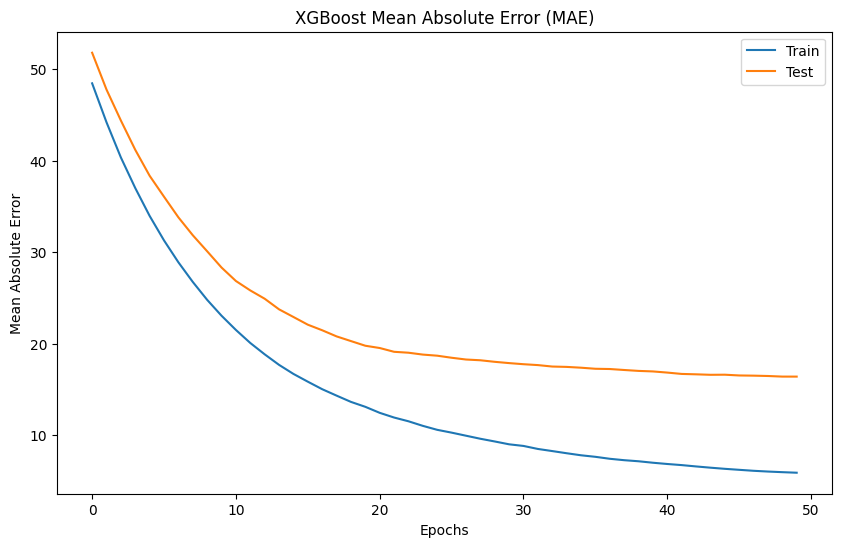

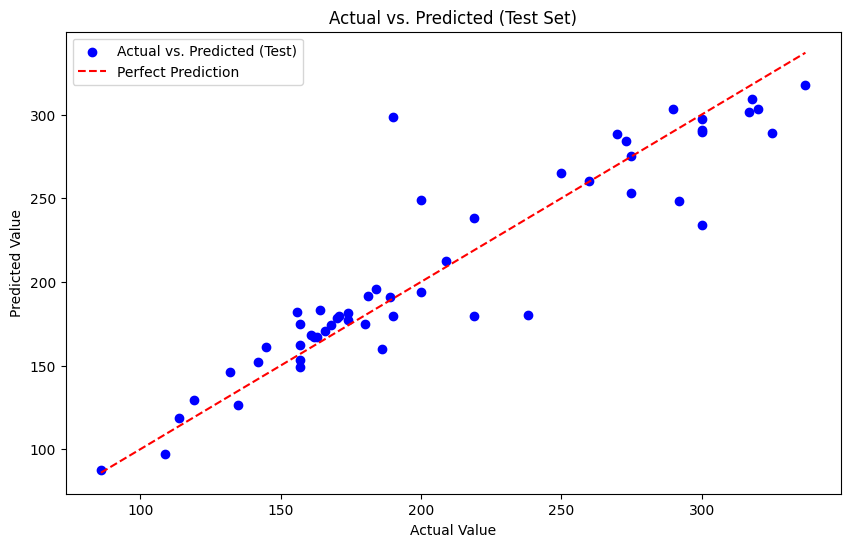

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoostRegressor
xgb_model = XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
}

eval_set = [(X_train, y_train), (X_test, y_test)]

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train, eval_set=eval_set, eval_metric=["mae", "rmse"], verbose=False)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the testing set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) on Test Set:", mae_test)

# Calculate R-squared (R2) score on the testing set
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score on Test Set:", r2_test)

# Plot the training history
plt.figure(figsize=(10, 6))
results = best_model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

plt.plot(x_axis, results['validation_0']['mae'], label='Train')
plt.plot(x_axis, results['validation_1']['mae'], label='Test')
plt.title('XGBoost Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Plot the curve for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


**ANN-PSO**

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.neural_network import MLPRegressor
from pyswarm import pso

In [24]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=de56963ba91c1b36db0caa3bb182b83087d84a09a3f2798e18c156978c8501ca
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [26]:
#trying with other metrices
#### PSO-ANN Final
def objective_function(params):
    # Unpack parameters
    hidden_layer_sizes, activation, solver, alpha = params

    # Convert activation to string
    activation_str = ['logistic', 'identity', 'relu', 'tanh'][int(activation)-1]

    # Convert solver to string
    solver_str = ['lbfgs', 'sgd', 'adam'][int(solver)-1]

    # Create and train the neural network
    model = MLPRegressor(hidden_layer_sizes=int(hidden_layer_sizes), activation=activation_str, solver=solver_str, alpha=alpha, random_state=42)
    model.fit(X_train, y_train)

    # Calculate R2 score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return -r2  # Minimize negative R2 score

In [27]:
# Define lower and upper bounds for the hyperparameters
import numpy as np
lb = [1, 1, 1, 1e-6]  # Lower bounds for hidden_layer_sizes, activation, solver, alpha
ub = [100, 4, 3, 1]   # Upper bounds for hidden_layer_sizes, activation, solver, alpha

# Run PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=20, maxiter=100)

# Extract best parameters
hidden_layer_sizes, activation, solver, alpha = best_params

# Convert activation to string
activation_str = ['logistic', 'identity', 'relu', 'tanh'][int(activation)-1]

# Convert solver to string
solver_str = ['lbfgs', 'sgd', 'adam'][int(solver)-1]

# Create and train the final neural network with the best parameters
final_model = MLPRegressor(hidden_layer_sizes=int(hidden_layer_sizes), activation=activation_str, solver=solver_str, alpha=alpha, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Final R2 Score:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (y_test.max() - y_test.min())
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Variance Accounted For (VAF)
vaf = 1 - (np.var(y_test - y_pred) / np.var(y_test))
print("Variance Accounted For (VAF):", vaf)

Streaming output truncated to the last 5000 lines.
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_i

Stopping search: Swarm best position change less than 1e-08
Final R2 Score: 0.8862116991459361
Root Mean Squared Error (RMSE): 22.299401348346947
Normalized Root Mean Squared Error (NRMSE): 0.0888422364475974
Mean Absolute Error (MAE): 15.628794910223982
Mean Absolute Deviation (MAD): 15.628794910223982
Variance Accounted For (VAF): 0.8870692014061676


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [28]:
# PSO-Gradient Boosting Algorithm

In [29]:
def objective_function(params):
    # Unpack parameters
    n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf = params

    # Create Gradient Boosting Regressor model with specified hyperparameters
    model = GradientBoostingRegressor(n_estimators=int(n_estimators),
                                      learning_rate=learning_rate,
                                      max_depth=int(max_depth),
                                      min_samples_split=int(min_samples_split),
                                      min_samples_leaf=int(min_samples_leaf),
                                      random_state=42)

    # Perform cross-validation and calculate mean R2 score
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_r2_score = np.mean(cv_r2_scores)

    return -mean_r2_score  # Minimize negative mean R2 score

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define bounds for hyperparameters
lb = [50, 0.01, 1, 2, 1]    # Lower bounds for n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf
ub = [500, 0.5, 10, 20, 10]  # Upper bounds for n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf

# Run PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=20, maxiter=50)

# Extract best parameters
n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf = best_params

# Create Gradient Boosting Regressor model with best parameters
best_model = GradientBoostingRegressor(n_estimators=int(n_estimators),
                                       learning_rate=learning_rate,
                                       max_depth=int(max_depth),
                                       min_samples_split=int(min_samples_split),
                                       min_samples_leaf=int(min_samples_leaf),
                                       random_state=42)

# Train the model on the full training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_r2_score = best_model.score(X_test, y_test)
print("Test R2 Score:", test_r2_score)


Stopping search: maximum iterations reached --> 50
Test R2 Score: 0.8274898726743887


In [31]:
##Lasso and Ridge
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score (Lasso Regression):", r2)

R2 Score (Lasso Regression): 0.8401523794721424


In [32]:
from sklearn.linear_model import Ridge
alphas = [0.01, 0.1, 1, 10]  # List of alpha values to try
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score (Ridge Regression) with alpha={alpha}: {r2}")

R2 Score (Ridge Regression) with alpha=0.01: 0.8400141649829309
R2 Score (Ridge Regression) with alpha=0.1: 0.839117069451429
R2 Score (Ridge Regression) with alpha=1: 0.8345914416605248
R2 Score (Ridge Regression) with alpha=10: 0.803270682513602


**PSO-SVM**

In [35]:
#trying with other metrices
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


In [36]:

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [38]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import r2_score
import sys

class color:
    BOLD = '\033[1m'

def svr_fitness_function(X_train, X_val, X_test, y_train, y_val, y_test):
    def particles_last_predictions(c, n_particles, k):
        predictions = []
        for i in range(n_particles):
            rgs = svm.SVR(C=c[i][0], epsilon=c[i][1], gamma=c[i][2])
            rgs.fit(X_train, y_train)
            predictions.append(rgs.predict(X_test))
        predictions = np.array(predictions)
        average_p = np.mean(predictions, axis=0)
        median_p = np.median(predictions, axis=0)
        sorted_indices = np.argsort(np.abs(predictions - y_test).mean(axis=1))
        av_k_best_p = np.mean(predictions[sorted_indices[:k]], axis=0)
        md_k_best_p = np.median(predictions[sorted_indices[:k]], axis=0)
        return average_p, median_p, av_k_best_p, md_k_best_p

    def residual_performance(predict_test, y_test_raw):
        mse = r2_score(y_test_raw, predict_test)
        return mse

    def results(best_regression, average_p, median_p, av_k_best_p, md_k_best_p):
        final_exp_p = best_regression.predict(X_test)
        final_exp_av = average_p
        final_exp_md = median_p
        final_exp_av_k = av_k_best_p
        final_exp_md_k = md_k_best_p
        return final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k

    def plot(c):
        pass

    def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):
        max_c = 1e4
        min_c = 1e-3
        max_e = 1e-1
        min_e = 1e-8
        max_g = 1e3
        min_g = 1e-3

        p_best_RGS = np.empty((n_particles), dtype=object)
        g_best_RGS = -sys.maxsize

        for e in range(experiments):
            x = np.random.rand(n_particles, 1) * (max_c - min_c) + min_c
            y = np.random.rand(n_particles, 1) * (max_e - min_e) + min_e
            z = np.random.rand(n_particles, 1) * (max_g - min_g) + min_g
            c = np.concatenate((x, y, z), axis=1)

            v = np.zeros((n_particles, dimensions))
            c1 = 2
            c2 = 2
            p_best = np.zeros((n_particles, dimensions))
            p_best_val = np.zeros(n_particles) - sys.maxsize
            g_best = np.zeros(dimensions)
            g_best_val = -sys.maxsize

            for i in range(iterations):
                for j in range(n_particles):
                    rgs = svm.SVR(C=c[j][0], epsilon=c[j][1], gamma=c[j][2])
                    rgs.fit(X_train, y_train)
                    y_predict = rgs.predict(X_val)
                    mse = r2_score(y_val, y_predict)

                    if mse > p_best_val[j]:
                        p_best_val[j] = mse
                        p_best_RGS[j] = rgs
                        p_best[j] = c[j].copy()

                    aux = np.argmax(p_best_val)
                    if p_best_val[aux] > g_best_val:
                        g_best_val = p_best_val[aux]
                        g_best = p_best[aux].copy()
                        g_best_RGS = p_best_RGS[aux]

                    rand1 = np.random.random()
                    rand2 = np.random.random()
                    w = inertia
                    v[j] = w * v[j] + c1 * (p_best[j] - c[j]) * rand1 + c2 * (g_best - c[j]) * rand2
                    c[j] = c[j] + v[j]

                    if c[j][2] < min_g:
                        c[j][2] = min_g
                    if c[j][2] > max_g:
                        c[j][2] = max_g
                    if c[j][1] < min_e:
                        c[j][1] = min_e
                    if c[j][1] > max_e:
                        c[j][1] = max_e
                    if c[j][0] < min_c:
                        c[j][0] = min_c
                    if c[j][0] > max_c:
                        c[j][0] = max_c

            predict_test = g_best_RGS.predict(X_test)
            r2_test = r2_score(y_test, predict_test)
            return g_best_RGS, g_best, predict_test

    return pso

def main():
    # Parameters
    n_particles = 10
    iterations = 50
    dimensions = 3
    inertia = 0.5
    k_best_particles = 3
    experiments = 3

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Execute PSO to optimize SVR parameters
    svr_pso = svr_fitness_function(X_train, X_val, X_test, y_train, y_val, y_test)
    best_regression, best_configuration, probable_best_predictions = svr_pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments)

    # Evaluate performance of the best SVR model
    r2_best = r2_score(y_test, probable_best_predictions)
    print('R2 Score of Best SVR Model:', r2_best)
    rmse = np.sqrt(mean_squared_error(y_test, probable_best_predictions))
    nrmse = rmse / (y_test.max() - y_test.min())
    mae = mean_absolute_error(y_test, probable_best_predictions)
    mad = np.mean(np.abs(y_test - probable_best_predictions))
    vaf = 1 - (np.var(y_test - probable_best_predictions) / np.var(y_test))

    print("RMSE:", rmse)
    print("NRMSE:", nrmse)
    print("MAE:", mae)
    print("MAD:", mad)
    print("VAF:", vaf)

if __name__ == "__main__":
    main()


R2 Score of Best SVR Model: 0.839421104096663
RMSE: 25.488049930385763
NRMSE: 0.10074328035725598
MAE: 20.776904045997036
MAD: 20.776904045997036
VAF: 0.8404946519539749
